In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
Comparison = pd.read_csv("Output Data/Comparison.csv")
Coverage = pd.read_csv("Output Data/ID_Coverage.csv")

In [3]:
def FI(ID):
    ID_comp = Comparison[Comparison["ID (CME)"] == ID]
    ID_cov = Coverage[Coverage["ID (CME)"] == ID]
    comp = ID_comp.to_numpy()
    cov = ID_cov.to_numpy()
    data = cov[0][4]
    Dino_data = np.array([row.split(',') for row in data.split(';')], float)
    FI_Dino = np.zeros((len(Dino_data)),dtype=object)
    t_Dino = np.zeros((len(Dino_data)),dtype=object)
    for i, rows in enumerate(Dino_data[:-1]):
        FI_Dino[i] = comp[int(Dino_data[i][1]-1):int(Dino_data[i+1][1]-1),12]
        t_Dino[i] = comp[int(Dino_data[i][1]-1):int(Dino_data[i+1][1]-1),8]
    FI_Dino[-1] = comp[int(Dino_data[-1][1]-1):,12]
    t_Dino[-1] = comp[int(Dino_data[-1][1]-1):,8]
    ID_Dino = Dino_data[:,0]
    FI_CME = comp[:,11]
    t_full = comp[:,8]
    return t_full, FI_CME, t_Dino, ID_Dino, FI_Dino

def FI_plot(ID_array):
    ids = np.atleast_1d(ID_array)
    n = len(ids)
    if n in [3, 4]:
        rows, cols = 2, 2
    else:
        cols = min(n, 3)
        rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
    axes = np.array(axes).reshape(-1)
    for idx, ID in enumerate(ids):
        t_full, FI_CME, t_Dino, ID_Dino, FI_Dino = FI(ID)
        mD, mC = max(map(max, FI_Dino)), np.max(FI_CME)
        ax = axes[idx]
        uniq = np.unique(ID_Dino)
        colors = [plt.cm.gist_rainbow(i/len(uniq)) for i in range(len(uniq)+1)]
        ax.plot(t_full, FI_CME/mC, label=f"CME: {ID}", color=colors[0])
        plotted = set()
        for i, dino in enumerate(ID_Dino):
            
            k = np.where(uniq==dino)[0][0]
            x, y = t_Dino[i], FI_Dino[i]/mD
            label = f"Dino: {dino}" if dino not in plotted else None
            if len(x) == 1:
                xx = np.array([x[0]-0.1, x[0]+0.1])
                yy = np.array([y[0], y[0]])
                ax.plot(xx, yy, color=colors[k+1], label=label)
            else:
                ax.plot(x, y, color=colors[k+1], label=label)
            plotted.add(dino)
        ax.set(xlim=(0,100), xlabel="Time", ylabel="FI", title=f"ID (CME): {ID}")
        ax.legend(labelspacing=0.2)
    for ax in axes[n:]: ax.axis("off")
    plt.tight_layout()
    plt.show()
    #plt.savefig("Plots/Fluorescence Track.png")

Comp_choice = Comparison[Comparison["Track Length (CME)"] == 99]
choice_list = np.unique(Comp_choice.to_numpy()[:,0]).astype(int)
#choice_list = np.array((1,2,3,4,5,6))
#FI_plot(choice_list)

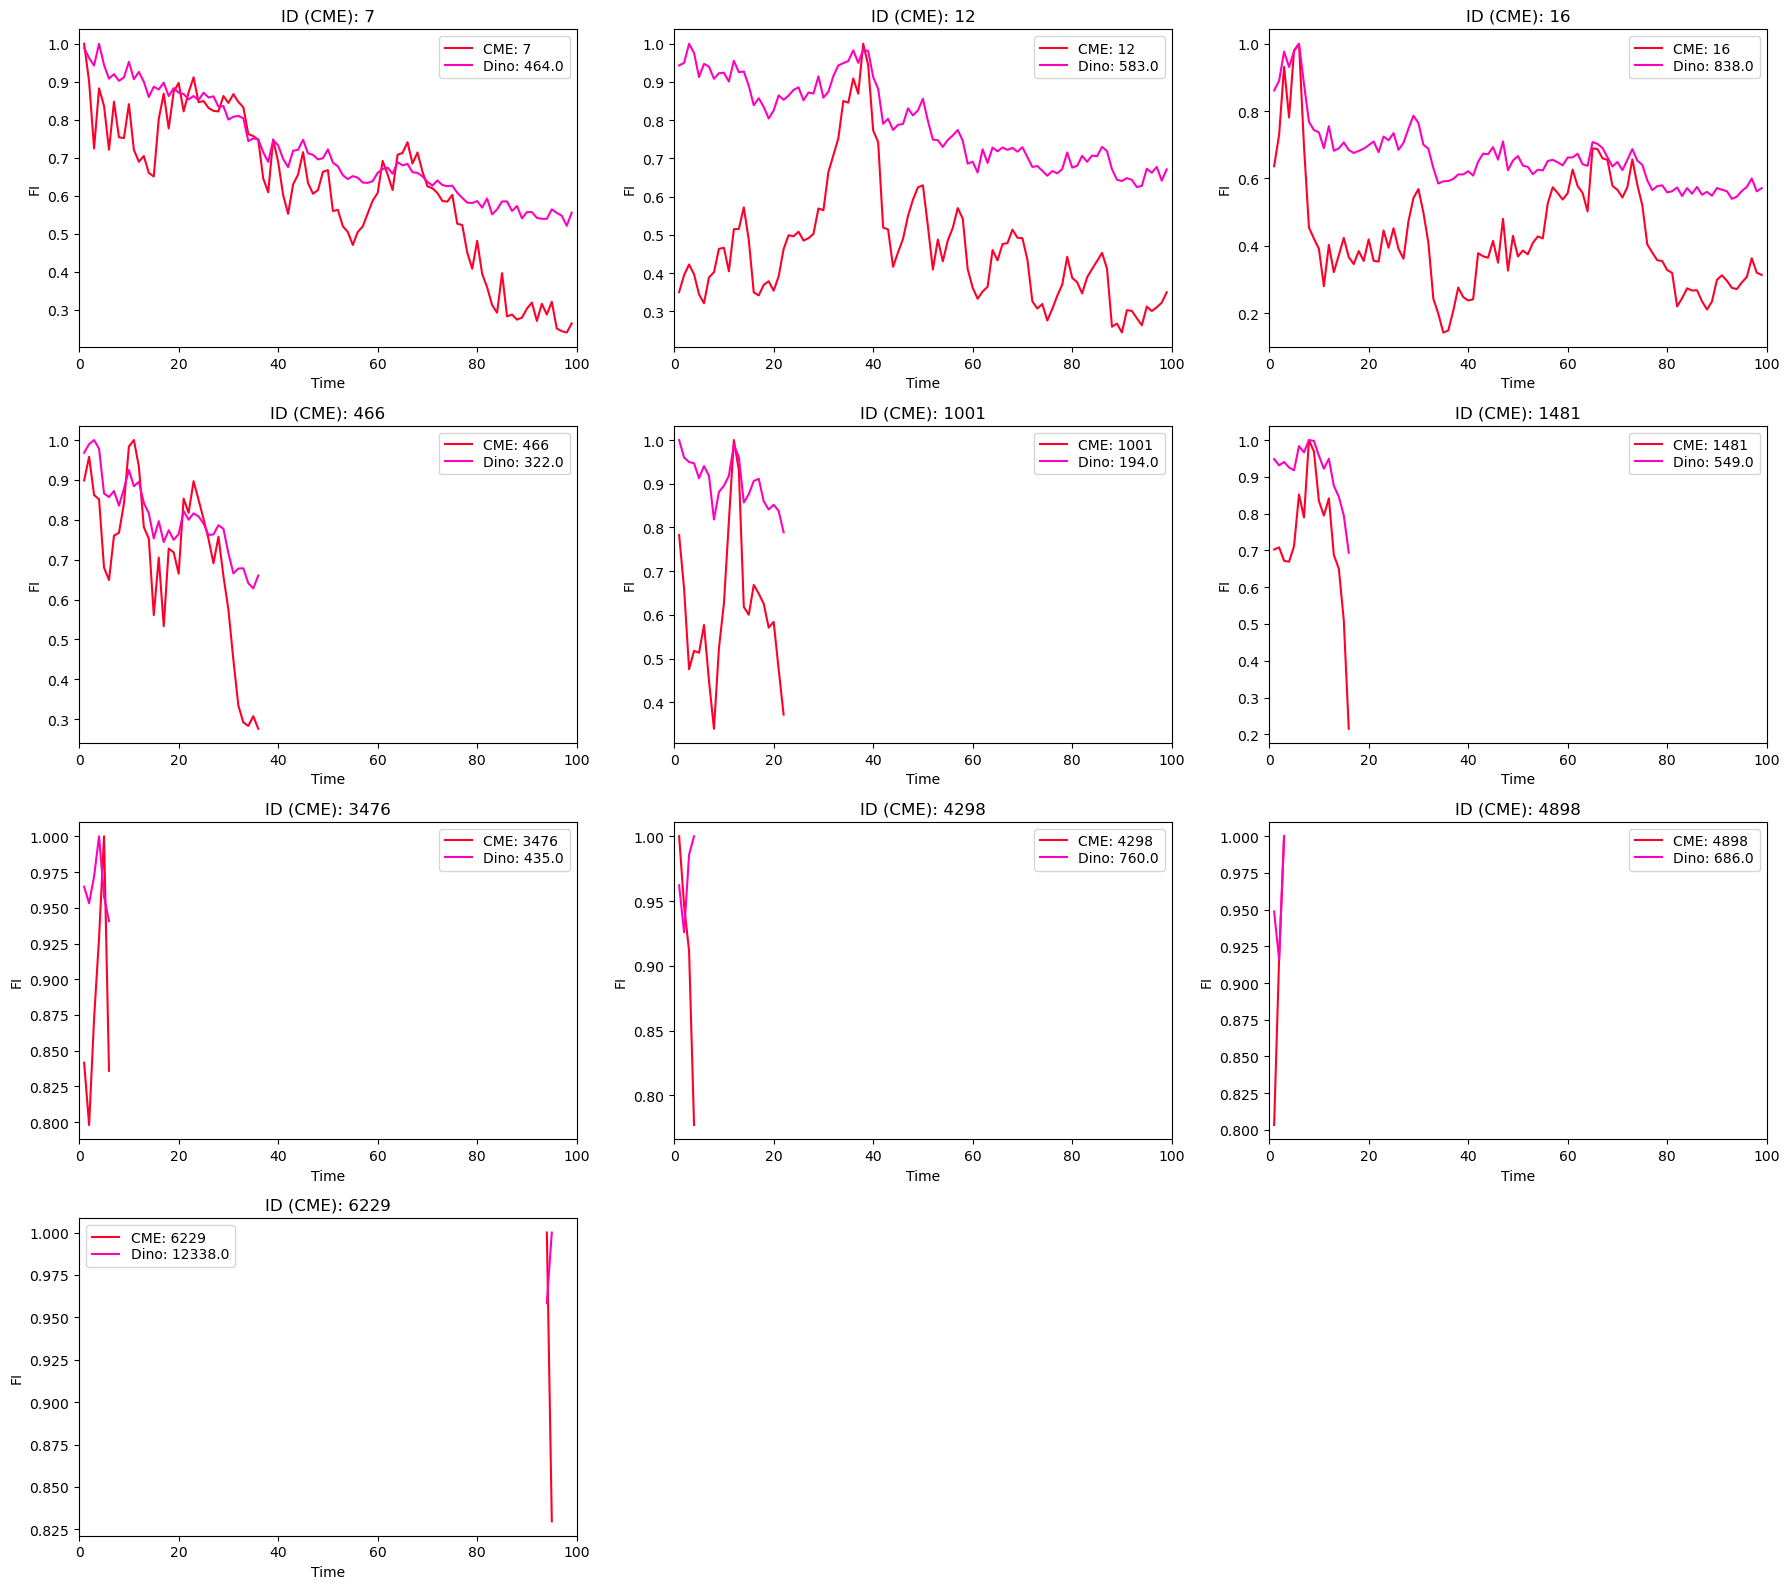

In [4]:
Sum = pd.read_csv("Output Data/Sum.csv")
Sum = Sum[Sum["True Match"]==True]
#Sum = Sum[Sum["Track Length (CME)"]>10]
True_ID = np.array(Sum["ID (CME)"])
True_ID= np.array([int(float(s.strip("[]"))) for s in True_ID])
FI_plot(True_ID)